<a href="https://colab.research.google.com/github/HaseebHussainMd/Projects/blob/main/Jamboree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***IVY league Admission Prediction***

**About Jamboree**

Jamboree has helped thousands of students to make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.


**Problem Statement :**

To analyze Jamboree's dataset in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves and to help predict one's chances of admission given the rest of the variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv
To: /content/Jamboree_Admission.csv
100% 16.2k/16.2k [00:00<00:00, 40.7MB/s]


In [3]:
df = pd.read_csv('Jamboree_Admission.csv')

In [4]:
print(f"Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}")

Number of rows: 500
Number of columns: 9


In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
#Dropping the unique row Identifier
df.drop('Serial No.', axis=1, inplace=True)

In [7]:
df.info() #Columns and its datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [8]:
# Statistical summary
df.describe(include='all')

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
print('\nColumns with missing value:')
print(df.isnull().any())


Columns with missing value:
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool


In [10]:
# Check value counts for categorical variables
print(df['Research'].value_counts())
print(df['University Rating'].value_counts())

Research
1    280
0    220
Name: count, dtype: int64
University Rating
3    162
2    126
4    105
5     73
1     34
Name: count, dtype: int64


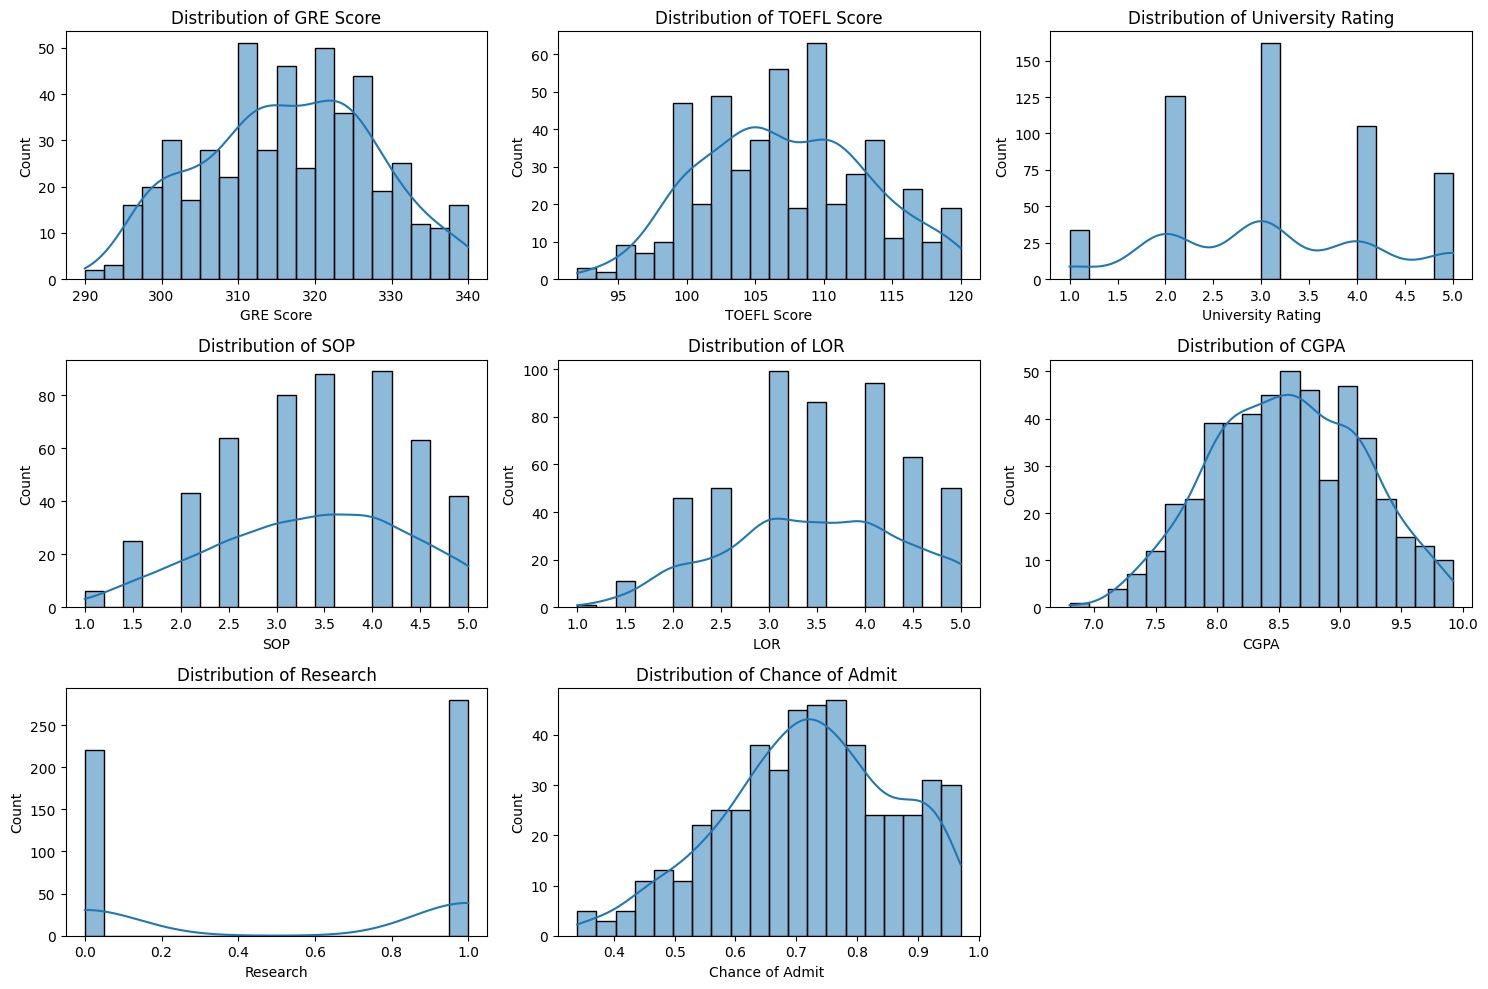

In [11]:
# Plotting histograms for numerical features
numerical_features = df.select_dtypes(include=['int', 'float']).columns

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
  plt.subplot(3, 3, i)
  sns.histplot(df[feature], bins=20, kde=True)
  plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# **Observations :**
*   There are no missing values in the dataset.

**GRE Score :**

The GRE score distribution is approximately normal, with a mean around 310.
Most applicants have scores between 290 & 330.

**TOEFL Score :**

The TOEFL score distribution is also approximately normal, with a mean around 105.
Most applicants have scores between 95 & 115.

**University Rating :**

The distribution of university ratings is skewed to the right,There are more universities with lower ratings than higher ratings.
Most universities have a rating between 2 & 4.

**SOP :**

The distribution of SOP scores is skewed to the right, with a peak around 3.5.
Many applicants are submitting SOPs that are considered to be of average or above-average quality.

**LOR :**

The distribution of LOR scores is also skewed to the right, with a peak around 3.5.
Many applicants are receiving LORs that are considered to be of average or above-average quality.

**CGPA :**

The distribution of CGPA is skewed to the left,There are more applicants with higher CGAs than lower CGAs.
Most applicants have a CGPA between 8.5 & 9.5.

**Chance of Admit :**

The distribution of Chance of Admit is skewed to the left, with a peak around 0.7.
Most applicants have a moderate to high chance of admission.

# **Outliers**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

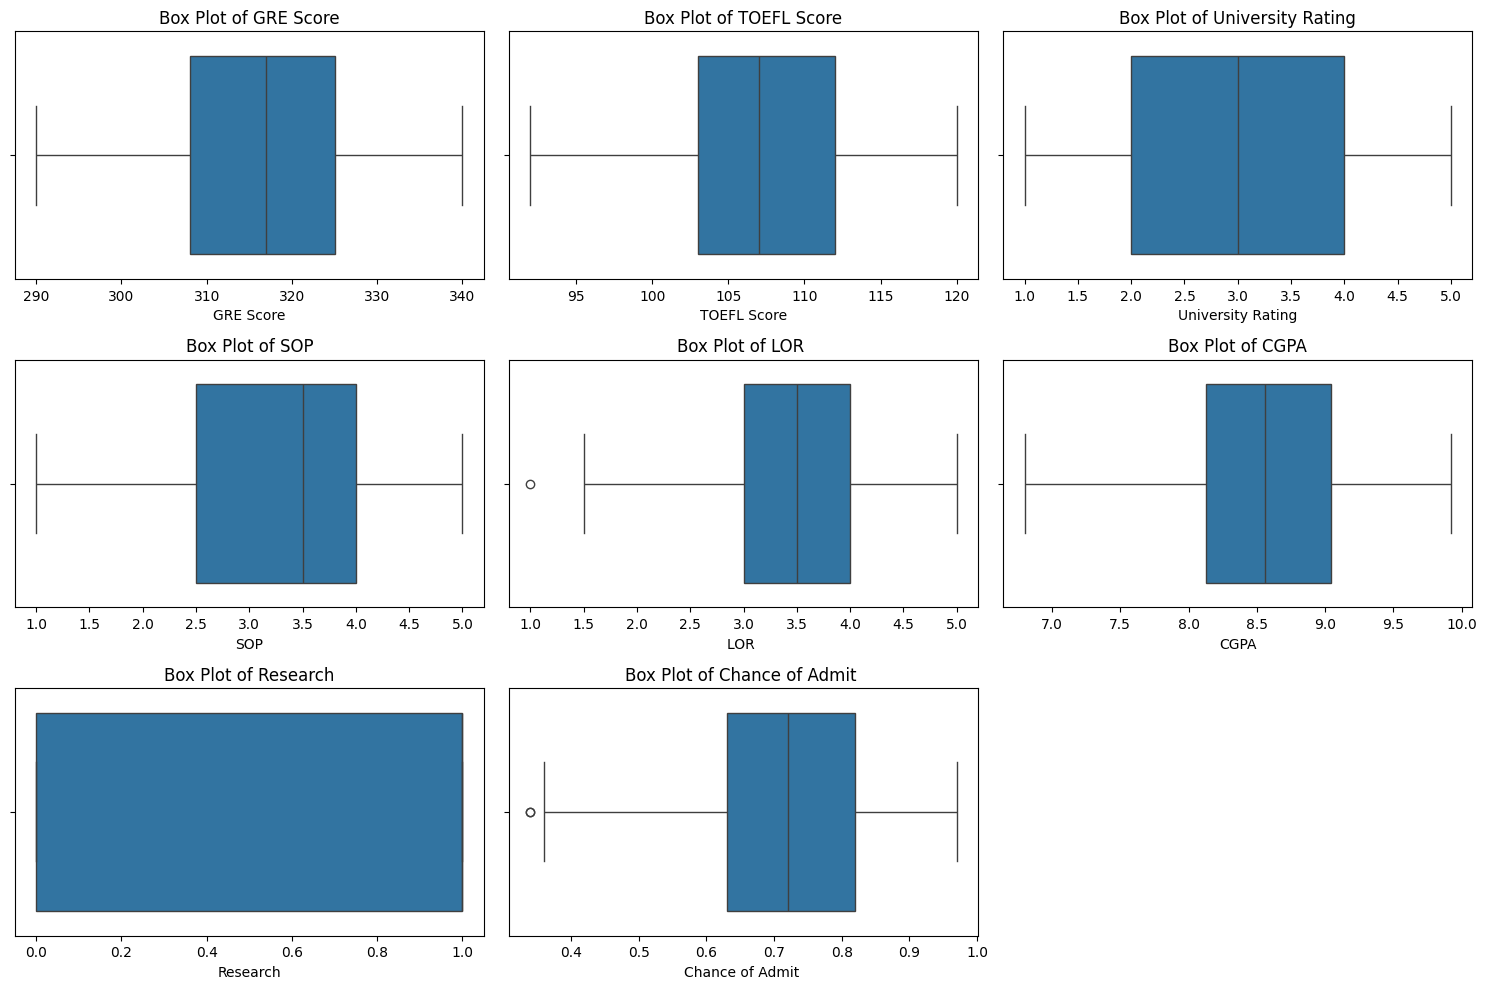

In [12]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

**Observations :**


*   There are no outliers in the dataset.



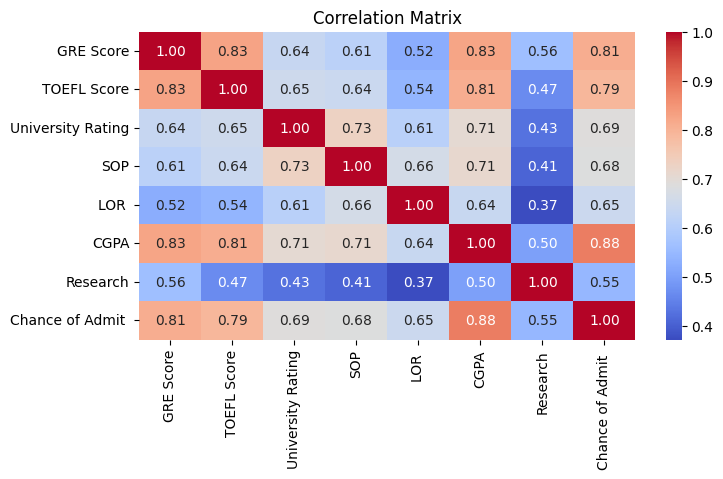

In [13]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**Chance of Admit and CGPA :** CGPA has a very strong positive correlation (0.88) with the chance of admission, highlighting its significant impact on admissions decisions.

**GRE Score and TOEFL Score :** These two variables have strong positive correlation (0.83), indicating that students who perform well on the GRE tend to also perform well on the TOEFL.

**GRE Score and CGPA :** There's a strong positive correlation (0.83) between GRE scores and CGPA, suggesting that students with higher GRE scores tend to have higher academic performance.

**TOEFL Score and CGPA :** Similar to the relationship with GRE, TOEFL scores have a strong positive correlation (0.81) with CGPA.

**Chance of Admit and GRE Score :** The chance of admission is strongly positively correlated (0.81) with GRE scores, indicating that higher GRE scores increase the likelihood of admission.

**Chance of Admit and TOEFL Score :** TOEFL scores also have a strong positive correlation (0.79) with the chance of admission.

**University Rating and SOP :** There's a moderate positive correlation (0.73) between university rating and SOP, suggesting that students applying to higher-ranked universities might be more likely to submit stronger SOPs.

**Research Experience and Chance of Admit :** Research experience has a moderate positive correlation (0.55) with the chance of admission, suggesting that it can be a beneficial factor but may not be as influential as GRE, TOEFL, CGPA, or SOP.

**SOP and LOR :** While both SOP and LOR have moderate positive correlations with Chance of Admit, their correlation with each other is also moderate (0.66), indicating that these two factors may not be entirely independent.

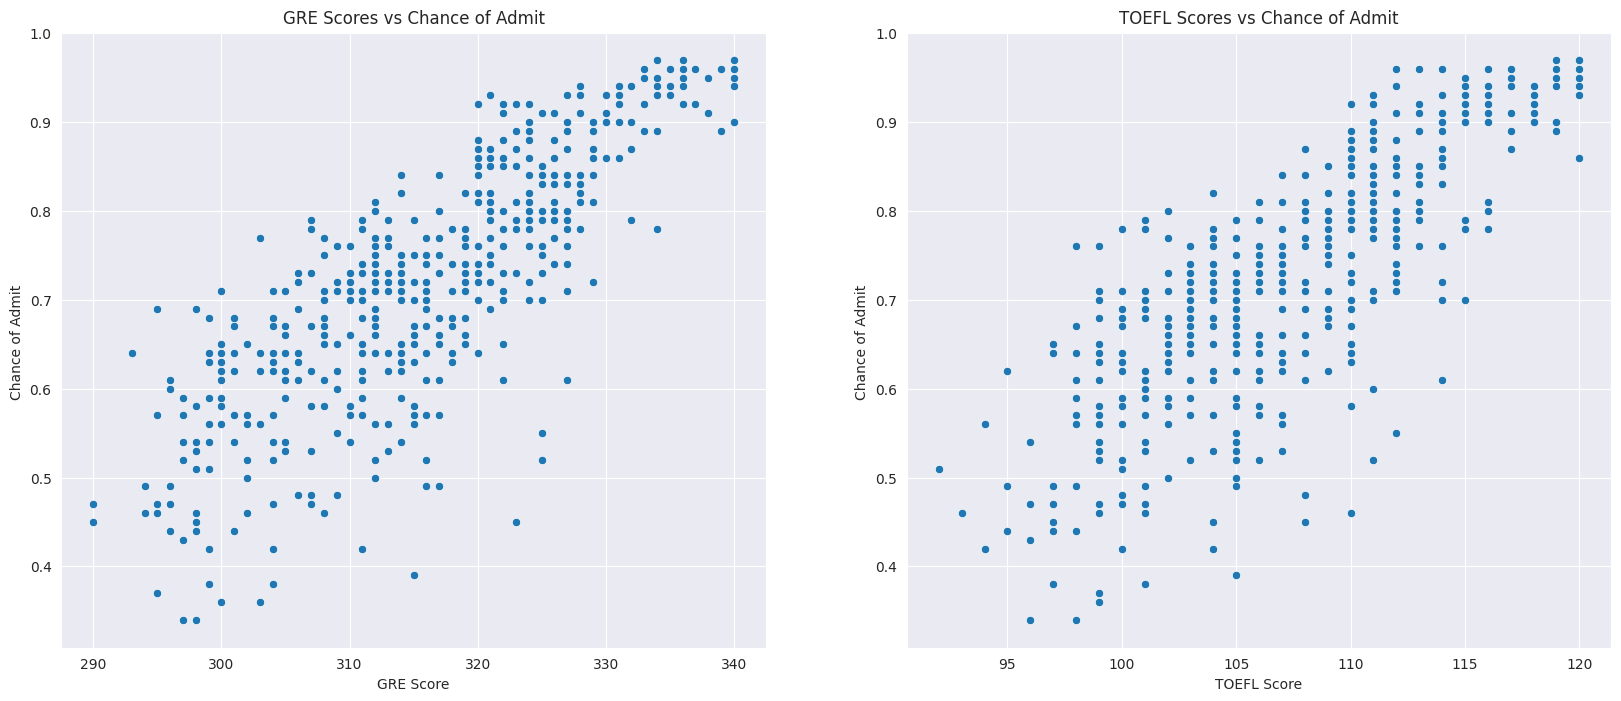

In [14]:
# Scatter plot between GRE Scores and Chance of Admit
plt.figure(figsize=(20,8))
sns.set_style('darkgrid')
plt.subplot(1,2,1)
sns.scatterplot(x='GRE Score', y='Chance of Admit ', data=df)
plt.title('GRE Scores vs Chance of Admit')

# Scatter plot between TOEFL Scores and Chance of Admit
plt.subplot(1,2,2)
sns.scatterplot(x='TOEFL Score', y='Chance of Admit ', data=df)
plt.title('TOEFL Scores vs Chance of Admit')
plt.show()

**Chance of Admit and GRE Score :** The chance of admission is strongly correlated with GRE scores, indicating that higher GRE scores increase the likelihood of admission.

**Chance of Admit and TOEFL Score :** TOEFL scores also have a strong correlation with the chance of admission.

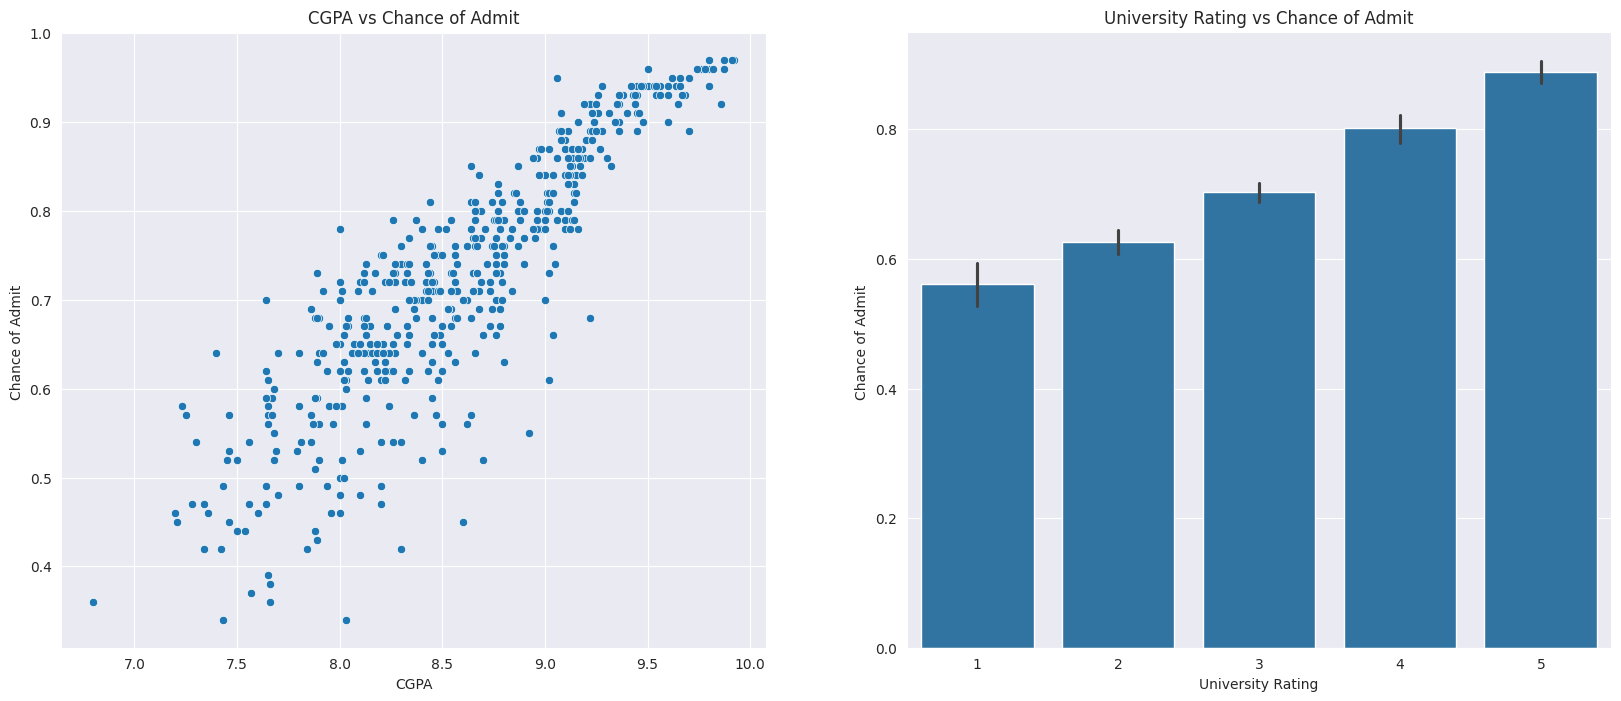

In [15]:
plt.figure(figsize=(20,8))
sns.set_style('darkgrid')
plt.subplot(1,2,1)
sns.scatterplot(x='CGPA', y='Chance of Admit ', data=df)
plt.title('CGPA vs Chance of Admit')


plt.subplot(1,2,2)
sns.barplot(x=df['University Rating'],y=df['Chance of Admit '])
plt.title('University Rating vs Chance of Admit')
plt.show()

**Chance of Admit and CGPA :** CGPA has a very strong correlation with the chance of admission, highlighting its significant impact on admissions decisions.

# **Model Building**

As all the data points are in number format we don't need to perform encoding.

In [16]:
# Defining features and target variable
X = df.drop(columns=['Chance of Admit '])
y = df['Chance of Admit ']

In [17]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Data Normalization/Standardization**

In [18]:
#Scaling the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit and transform training data
X_train_scaled = scaler.fit_transform(X_train)

In [19]:
#Converting back to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns,index=X_train.index)

In [20]:
X_train_scaled.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
249,0.389986,0.602418,-0.098298,0.126796,0.564984,0.415018,0.895434
433,-0.066405,0.602418,0.775459,0.633979,1.651491,-0.067852,-1.116777
19,-1.253022,-0.876917,-0.098298,0.126796,-0.521524,-0.134454,-1.116777
322,-0.248961,-0.055064,-0.972054,-0.887570,0.564984,-0.517420,-1.116777
332,-0.796631,-0.219435,-0.098298,0.126796,-1.064777,-0.617324,0.895434


In [21]:
import statsmodels.api as sm
# Adding a constant for intercept
X_train_scaled = sm.add_constant(X_train_scaled)

In [22]:
X_train_scaled.head()

,const,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
249,1.0,0.389986,0.602418,-0.098298,0.126796,0.564984,0.415018,0.895434
433,1.0,-0.066405,0.602418,0.775459,0.633979,1.651491,-0.067852,-1.116777
19,1.0,-1.253022,-0.876917,-0.098298,0.126796,-0.521524,-0.134454,-1.116777
322,1.0,-0.248961,-0.055064,-0.972054,-0.887570,0.564984,-0.517420,-1.116777
332,1.0,-0.796631,-0.219435,-0.098298,0.126796,-1.064777,-0.617324,0.895434


In [23]:
#Training the model
model = sm.OLS(y_train, X_train_scaled).fit()

In [24]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Wed, 09 Oct 2024   Prob (F-statistic):          3.41e-142
Time:                        14:24:04   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7242      0.00



*   82.1% is the training accuracy



In [25]:
# Display model coefficients
coefficients = pd.DataFrame(model.params, columns=['Coefficient'])
print(coefficients)

                   Coefficient
const                 0.724175
GRE Score             0.026671
TOEFL Score           0.018226
University Rating     0.002940
SOP                   0.001788
LOR                   0.015866
CGPA                  0.067581
Research              0.011940


In [26]:
# Identifying features with p-value > 0.05
p_values = model.pvalues
high_p_features = p_values[p_values > 0.05].index
print(high_p_features)

Index(['University Rating', 'SOP'], dtype='object')


In [27]:
# Drop those features from the model
X_train_dropped = X_train_scaled.drop(columns=high_p_features)

In [28]:
# Re-train the model
model_retrained = sm.OLS(y_train, X_train_dropped).fit()
print(model_retrained.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     360.8
Date:                Wed, 09 Oct 2024   Prob (F-statistic):          1.36e-144
Time:                        14:24:05   Log-Likelihood:                 561.54
No. Observations:                 400   AIC:                            -1111.
Df Residuals:                     394   BIC:                            -1087.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7242      0.003    241.830      

# **Test the Assumptions of Linear Regression**

**Multicollinearity Check by VIF Score**

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_dropped.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_dropped.values, i) for i in range(X_train_dropped.shape[1])]
print(vif_data)

       Feature       VIF
0        const  1.000000
1    GRE Score  4.471557
2  TOEFL Score  3.540082
3         LOR   1.655867
4         CGPA  4.281365
5     Research  1.504670


There are no features with VIF>5

In [30]:

# Drop features with VIF > 5
while vif_data['VIF'].max() > 5:
  max_vif_feature = vif_data.loc[vif_data['VIF'].idxmax(), 'Feature']
  X_train_dropped = X_train_dropped.drop(columns=max_vif_feature)
  vif_data = pd.DataFrame()
  vif_data['Feature'] = X_train_dropped.columns
  vif_data['VIF'] = [variance_inflation_factor(X_train_dropped.values, i) for i in range(X_train_dropped.shape[1])]

print(vif_data)


       Feature       VIF
0        const  1.000000
1    GRE Score  4.471557
2  TOEFL Score  3.540082
3         LOR   1.655867
4         CGPA  4.281365
5     Research  1.504670


**Mean of Residuals**

In [31]:
residuals = model_retrained.resid
print(f'Mean of residuals: {residuals.mean()}')

Mean of residuals: -4.2063574845485617e-16


The mean of the residuals is close to zero, which is a good sign.On average, the model's predictions are very close to the actual values

**Test for Homoscedasticity**

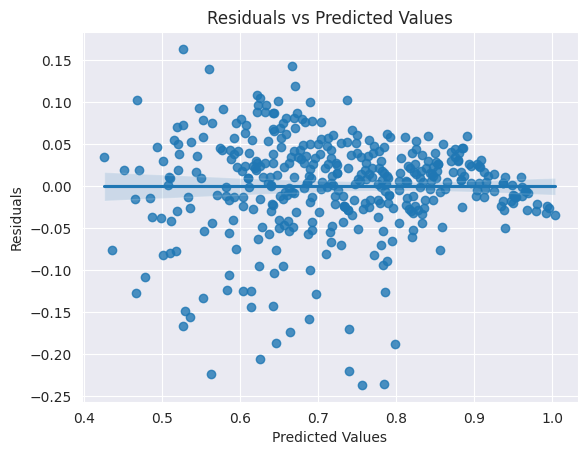

In [32]:
sns.regplot(x=model_retrained.fittedvalues, y=residuals)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In the above plot, the points appear to be randomly scattered around the horizontal line at 0, with no clear pattern. This is a good sign for the linear regression model, suggesting that the assumption of homoscedasticity is likely met.

## **Normality of Residuals**

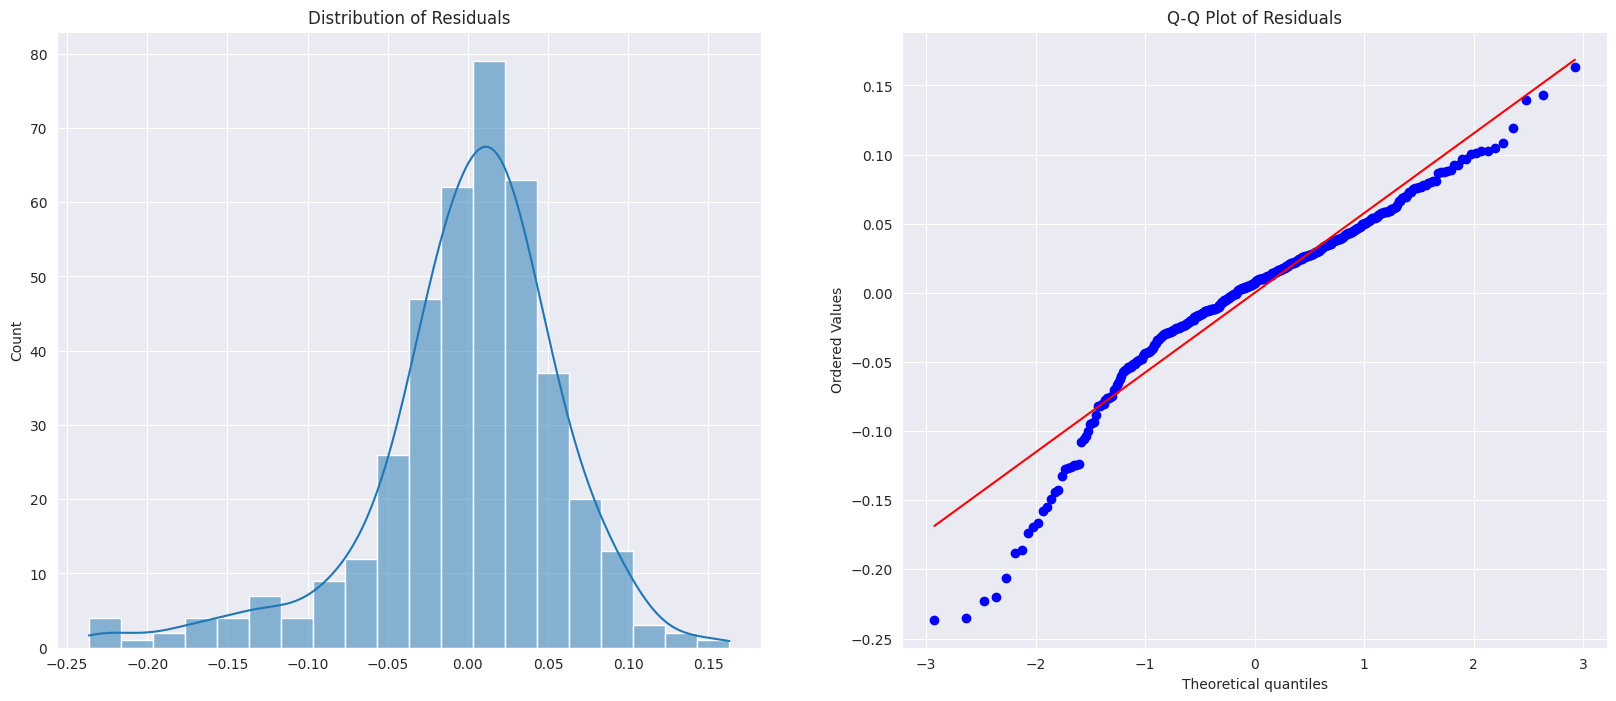

In [33]:
import scipy.stats as stats

# Histogram of residuals
plt.figure(figsize=(20,8))
sns.set_style('darkgrid')
plt.subplot(1,2,1)
sns.histplot(residuals, bins=20, kde=True)
plt.title('Distribution of Residuals')

# Q-Q plot
plt.subplot(1,2,2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


Distribution of residuals and Q-Q plot suggest that the residuals are approximately normally distributed, there are some indications of deviations from normality, especially in the tails.

**Evaluating the Model's Performance**

In [34]:
X_test_scaled = scaler.fit_transform(X_test)

In [35]:
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns,index = X_test.index )

In [36]:
X_test_dropped = X_test_scaled.drop(columns=high_p_features)

In [37]:
X_test_scaled = sm.add_constant(X_test_dropped)

In [38]:
y_pred = model_retrained.predict(X_test_scaled)

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test_scaled.shape[1] - 1)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Square Error (RMSE): {rmse}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Absolute Error (MAE): 0.04237494348984026
Root Mean Square Error (RMSE): 0.06187899811621445
R-squared: 0.8127623272436933
Adjusted R-squared: 0.8006824773884478


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# **Insights**

**Training Performance:**


*   R-squared : 0.821 indicates that the model explains **82.1%** of the variance in the Chance of Admit. This is quite high and suggests a strong model fit.
*   Adjusted R-squared : 0.818 adjusts for the number of predictors, confirming that the model's complexity is justified.

**Testing Performance:**

*   Mean Absolute Error (MAE) : 0.0424 indicates that the predictions deviate from actual values by about 4.24% on average.
*   Root Mean Square Error (RMSE) : 0.0619, which suggests that while most predictions are close, some can be off by as much as 6.19%.
*   R-squared : 0.8128 indicates that the model explains **81.2%** of the variance in the Chance of Admit.

**Data Insights :**

*   CGPA and GRE scores are the strongest predictors of admission chances. Institutions should prioritize supporting students in these areas.
*   Implement targeted preparatory programs for standardized tests, which could significantly improve admission chances for applicants.

**Recommendations :**
*   Develop workshops or online courses aimed at enhancing GRE and TOEFL scores.
*   Create mentorship programs that guide students on obtaining strong Letters of Recommendation (LORs) and highlighting research experiences.

**Significance of Predictor Variables :**


*   Apart from University rating and SOP all other predictor variables are statistically significant (p-values < 0.05), indicating they contribute meaningfully to the model.
*   CGPA has the largest coefficient (0.0691), suggesting it has the most substantial positive impact on admission chances.
*   GRE and TOEFL scores also show strong effects, emphasizing the importance of academic testing in admissions.